In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#матрицы переходов и эмиссий
k = 6 #количество возможных наблюдаемых состояний
m = int(2) #количество скрытых состояний

pi = np.array([(k-m)/k, m/k])
h = (1 / k)
states = [0, 1]

T = np.array([[0.95, 0.05], [0.1, 0.9]])
E = np.array([[h, h, h, h, h, h], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])

L = int(300) #длина генерируемой цепочки

In [3]:
def init(k, m):
    if 0 <= np.random.random() < pi[0]:
        H = states[0] #честно
    else:
        H = states[1] #нечестно
    return H

In [4]:
#При заданных параметрех системы используем случайный генератор СММ для того, 
#чтобы получить последовательность наблдаемых величин x длины L и соответствующую ей цепочку скрытых состояний.
def HMM(E, T, L):
    observed = np.array([], dtype=np.int)
    hidden = np.array([], dtype=np.int)
    
    H = init(k, m)
    
    for i in range(L):
        X = np.random.random()
        K = np.random.random()
        
        if (H == 0) and (X < T[0,1]):
            H = 1            
        elif (H == 1) and (X < T[1,0]):
            H = 0
            
        if H == 0:
            hidden = np.append(hidden, [0])
            observed = np.append(observed, [np.random.randint(1, 6)])
        elif H == 1:
            hidden = np.append(hidden, [1])            
            if K < 0.5:
                observed = np.append(observed, [6])                
            else:
                observed = np.append(observed, [np.random.randint(1, 5)])
    return(observed, hidden)

In [5]:
observed, hidden = HMM(E, T, L)

#наблюдение:
print(observed)

#состояние:
print(hidden)

[4 6 4 5 2 4 5 3 5 5 3 1 5 4 4 1 4 2 1 3 4 4 5 4 5 4 2 4 4 1 5 2 2 2 3 5 1
 6 6 6 3 3 5 5 4 2 1 3 4 2 4 6 6 6 6 6 6 3 2 2 2 2 5 4 3 4 6 4 2 6 2 6 6 4
 1 6 3 3 1 4 3 2 6 6 6 1 3 6 3 6 3 1 1 1 1 4 6 6 3 1 6 6 3 6 4 3 3 6 3 1 2
 6 3 4 1 1 6 1 3 4 2 6 4 2 5 1 2 4 2 4 6 6 5 3 2 3 5 5 5 4 5 2 1 2 2 4 5 3
 4 3 1 4 1 5 5 3 4 4 2 3 6 1 6 1 6 2 1 4 4 6 4 1 4 2 5 1 4 3 2 2 4 2 4 2 2
 2 1 1 1 4 2 5 4 5 2 3 1 4 3 1 1 2 5 2 4 1 1 6 6 6 5 3 6 6 3 2 6 2 2 6 1 6
 4 6 1 6 6 6 3 4 6 4 4 3 1 5 5 2 2 3 4 2 5 6 6 1 6 1 6 2 6 6 6 4 6 3 5 4 3
 3 2 2 3 1 2 4 4 4 4 2 2 5 1 3 1 6 2 5 1 4 3 4 1 5 5 2 1 2 4 5 2 2 2 4 1 5
 5 2 5 5]
[1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

In [6]:
observed

array([4, 6, 4, 5, 2, 4, 5, 3, 5, 5, 3, 1, 5, 4, 4, 1, 4, 2, 1, 3, 4, 4,
       5, 4, 5, 4, 2, 4, 4, 1, 5, 2, 2, 2, 3, 5, 1, 6, 6, 6, 3, 3, 5, 5,
       4, 2, 1, 3, 4, 2, 4, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 2, 5, 4, 3, 4,
       6, 4, 2, 6, 2, 6, 6, 4, 1, 6, 3, 3, 1, 4, 3, 2, 6, 6, 6, 1, 3, 6,
       3, 6, 3, 1, 1, 1, 1, 4, 6, 6, 3, 1, 6, 6, 3, 6, 4, 3, 3, 6, 3, 1,
       2, 6, 3, 4, 1, 1, 6, 1, 3, 4, 2, 6, 4, 2, 5, 1, 2, 4, 2, 4, 6, 6,
       5, 3, 2, 3, 5, 5, 5, 4, 5, 2, 1, 2, 2, 4, 5, 3, 4, 3, 1, 4, 1, 5,
       5, 3, 4, 4, 2, 3, 6, 1, 6, 1, 6, 2, 1, 4, 4, 6, 4, 1, 4, 2, 5, 1,
       4, 3, 2, 2, 4, 2, 4, 2, 2, 2, 1, 1, 1, 4, 2, 5, 4, 5, 2, 3, 1, 4,
       3, 1, 1, 2, 5, 2, 4, 1, 1, 6, 6, 6, 5, 3, 6, 6, 3, 2, 6, 2, 2, 6,
       1, 6, 4, 6, 1, 6, 6, 6, 3, 4, 6, 4, 4, 3, 1, 5, 5, 2, 2, 3, 4, 2,
       5, 6, 6, 1, 6, 1, 6, 2, 6, 6, 6, 4, 6, 3, 5, 4, 3, 3, 2, 2, 3, 1,
       2, 4, 4, 4, 4, 2, 2, 5, 1, 3, 1, 6, 2, 5, 1, 4, 3, 4, 1, 5, 5, 2,
       1, 2, 4, 5, 2, 2, 2, 4, 1, 5, 5, 2, 5, 5])

In [7]:
hidden

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
def viterbi(observed):
    V = np.zeros((L, m))
    ptr = np.zeros((L, m))
    for j in range(m):
        V[0, j] = np.log(E[j, observed[0]-1]) + np.log(pi[j])
    for i in range(1, L):
        for j in range(m):
            if j == 0:
                V[i, j] = np.log(E[j, observed[i]-1]) + np.max([V[i-1][1] + np.log(T[1,0]), V[i-1][j] + np.log(T[j, j])])
                #prom = [V[i-1][1]*T[1,0], V[i-1][j]*T[j, j]]
                #ptr[i, j] = np.argmax(prom)
            if j == 1:
                V[i, j] = np.log(E[j, observed[i]-1]) + np.max([V[i-1][0] + np.log(T[0,1]), V[i-1][j] + np.log(T[j, j])])
                
                #prom = [V[i-1][1]*T[0,1], V[i-1][j]*T[j, j]]
                #ptr[i, j] = np.argmax(prom)
            
            ptr[i, j] = np.argmax(V[i-1] + np.log(T[:, j]))
            
    vit = np.zeros(L, dtype=int)
    
    
    vit[-1] = np.argmax(V[-1] * T[:, -1])
    
    
    for i in range(L - 1, 0, -1):
        
        vit[i - 1] = ptr[i, vit[i]]
    return vit

In [9]:
V = viterbi(observed)
#viterbi = np.argmax(V, axis = 1)   
V

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

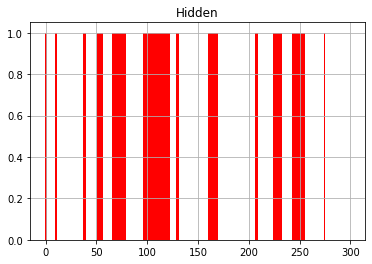

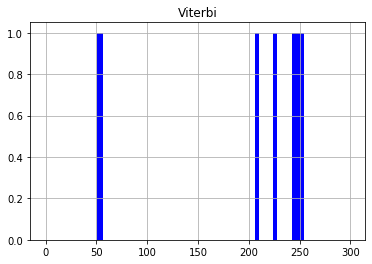

In [10]:
l = np.arange(L)
z1 = hidden
z2 = V

fig = plt.figure()
plt.bar(l, z1, color = 'red')
plt.title('Hidden')
plt.grid(True)

fig = plt.figure()
plt.bar(l, z2, color = 'blue')
plt.title('Viterbi')
plt.grid(True) 

In [11]:
def forward(obs, states, pi, T, E):
    
    fwd = np.zeros((L+1, m))
    for j in range(m):
        fwd[0, j] = pi[j]

    
    for state in states:
        fwd[1, state] = pi[state]*E[state, obs[0]-1]
    for i in range(2, L+1):
        for state1 in states:
            for state2 in states:
                fwd[i, state1] += fwd[i-1, state2]*T[state2, state1]  
            fwd[i, state1] *= E[state1, obs[i-1]-1]
    return fwd[1:]
    
F = forward(observed, states, pi, T, E)
print(F)

[[1.11111111e-001 3.33333333e-002]
 [1.81481481e-002 1.77777778e-002]
 [3.16975309e-003 1.69074074e-003]
 [5.30056584e-004 1.68015432e-004]
 [8.67258831e-005 1.77716718e-005]
 [1.40277927e-005 2.03307988e-006]
 [2.25495184e-006 2.53116152e-007]
 [3.61252644e-007 3.40552129e-008]
 [5.77659221e-008 4.87123238e-009]
 [9.22745821e-009 7.27240525e-010]
 [1.47313489e-009 1.11588938e-010]
 [2.35106174e-010 1.74086789e-011]
 [3.75152888e-011 2.74231197e-012]
 [5.98562593e-012 4.34384521e-013]
 [9.54963847e-013 6.90227365e-014]
 [1.52352988e-013 1.09868655e-014]
 [2.43056709e-014 1.75058284e-015]
 [3.87757427e-015 2.79080810e-016]
 [6.18600606e-016 4.45051442e-017]
 [9.86868483e-017 7.09846601e-018]
 [1.57437254e-017 1.13229618e-018]
 [2.51162813e-018 1.80625284e-019]
 [4.00684875e-019 2.88144162e-020]
 [6.39220121e-020 4.59672183e-021]
 [1.01975973e-020 7.33315025e-022]
 [1.62684149e-021 1.16986339e-022]
 [2.59533008e-022 1.86629779e-023]
 [4.14037759e-023 2.97733305e-024]
 [6.60522006e-024 4.

In [12]:
def backward(obs, states, pi, T, E):
    bk = np.zeros((len(obs), m))    
    bk[-1] = 1
    for i in range(L-2,-1,-1):
        for state in states:
            bk[i, state] = bk[i + 1, 0] + np.log(T[state, 0]) + np.log(E[0, obs[i + 1]-1])
            bk[i, state] += np.log(1 + np.e ** (bk[i + 1, 1] + np.log(T[state, 1]) + np.log(E[1, obs[i + 1]-1]) - (bk[i + 1, 0] + np.log(T[state, 0]) + np.log(E[0, obs[i + 1]-1]))))
            
    return bk
B = backward(observed, states, pi, T, E)
print(B)

[[-529.53905669 -529.81635345]
 [-527.73315241 -529.16152624]
 [-525.89764056 -527.32601438]
 [-524.06212872 -525.49050251]
 [-522.22661688 -523.65499063]
 [-520.39110503 -521.8194787 ]
 [-518.55559319 -519.98396672]
 [-516.72008135 -518.14845462]
 [-514.88456951 -516.31294233]
 [-513.04905768 -514.47742968]
 [-511.21354586 -512.64191638]
 [-509.37803406 -510.80640193]
 [-507.5425223  -508.97088541]
 [-505.7070106  -507.13536516]
 [-503.87149901 -505.29983821]
 [-502.03598763 -503.46429924]
 [-500.20047663 -501.62873866]
 [-498.36496629 -499.79313926]
 [-496.52945716 -497.95747016]
 [-494.69395018 -496.12167586]
 [-492.85844709 -494.28565678]
 [-491.02295097 -492.44923434]
 [-489.18746736 -490.61208869]
 [-487.35200626 -488.77364841]
 [-485.51658558 -486.93289708]
 [-483.68123753 -485.08804092]
 [-481.84602001 -483.23595826]
 [-480.01103714 -481.3713497 ]
 [-478.17647631 -479.485602  ]
 [-476.34267523 -477.56573128]
 [-474.51024413 -475.59452284]
 [-472.68029081 -473.5536549 ]
 [-470.8

In [13]:
def aposteor(F,B):
    ap = np.log(F[-1, 0]) + np.log(1 + np.e ** (np.log(F[-1, 1]) - np.log(F[-1, 0])))
    ap1 = F * np.e ** B / np.e ** ap
    ap1 /= np.max(ap1)
    return ap1
apost = aposteor(F,B)
apost

array([[0.82881518, 0.1884302 ],
       [0.82380948, 0.1934359 ],
       [0.90192945, 0.11531592],
       [0.94541401, 0.07183136],
       [0.96961918, 0.0476262 ],
       [0.9830927 , 0.03415268],
       [0.99059257, 0.0266528 ],
       [0.99476729, 0.02247809],
       [0.99709109, 0.02015429],
       [0.99838459, 0.01886079],
       [0.99910459, 0.01814079],
       [0.99950534, 0.01774004],
       [0.99972835, 0.01751703],
       [0.99985239, 0.01739299],
       [0.99992126, 0.01732412],
       [0.99995927, 0.01728611],
       [0.99997984, 0.01726553],
       [0.99999026, 0.01725512],
       [0.99999418, 0.01725119],
       [0.99999301, 0.01725237],
       [0.99998631, 0.01725907],
       [0.99997174, 0.01727364],
       [0.99994413, 0.01730125],
       [0.99989375, 0.01735163],
       [0.99980279, 0.01744258],
       [0.99963915, 0.01760622],
       [0.99934504, 0.01790034],
       [0.99881658, 0.0184288 ],
       [0.99786717, 0.01937821],
       [0.99616152, 0.02108385],
       [0.

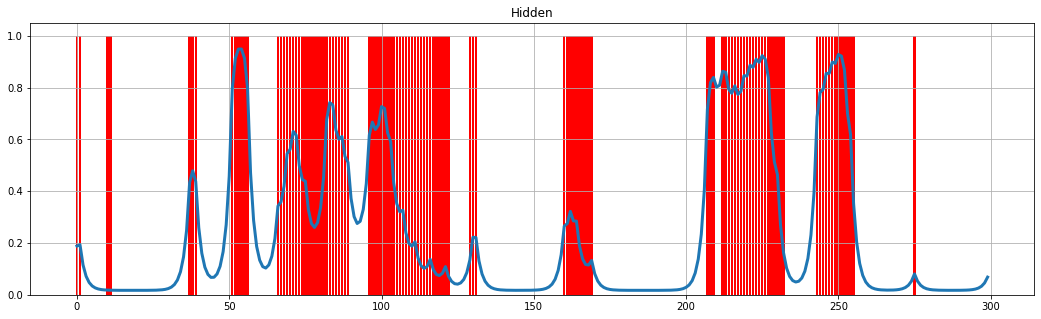

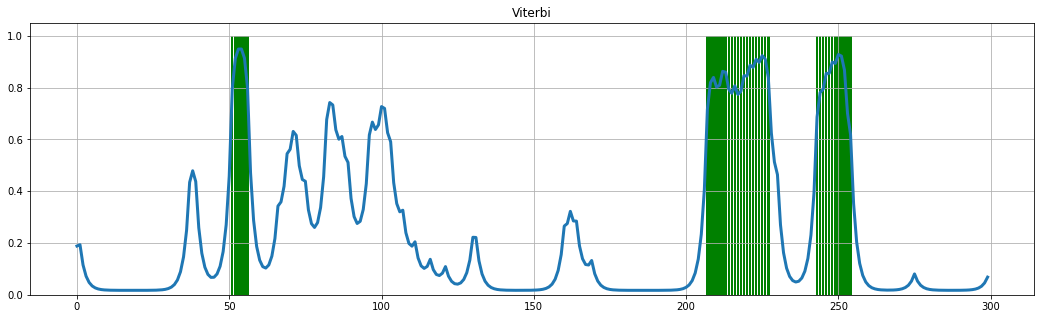

In [15]:
l = np.arange(L)
z1 = hidden
z2 = V

fig, ax = plt.subplots()
plt.bar(l, z1, color = 'red')
plt.title('Hidden')
plt.grid(True)
fig.set_figwidth(18)
fig.set_figheight(5)
ax.plot(range(len(observed)),apost[:,1], linewidth = 3)

fig, ax = plt.subplots()
plt.bar(l, z2, color = 'green')
plt.title('Viterbi')
plt.grid(True) 
fig.set_figwidth(18)
fig.set_figheight(5)
ax.plot(range(len(observed)),apost[:,1], linewidth = 3)
